<a href="https://colab.research.google.com/github/sharmisaha/sharmii/blob/main/Topic_Modelling_with_Haemophilia_Data_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the Necessary Libraries:

In [ ]:
!pip install tweet-preprocessor
!pip install bertopic
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 10.9 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.0 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039291 sha256=3bea0926db4a7a6f143906c071030503bc419138e4c9e784e89a2d068b18d40c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-l

# Importing The Necessary Libraries:

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import time
import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loading The Data:

In [ ]:
df = pd.read_csv("/content/my_data.csv")
df

,Unnamed: 0,tweet_id,external_twitter_id,text,author_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,infos,association_tweet_id,association_scope_id
0,0,1.030258e+06,1.680000e+18,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,9.050000e+17,28-07-2023 08:18,en,0,0.000000e+00,{},1.030258e+06,10
1,1,1.030186e+06,1.680000e+18,"Roche Drops Hemophilia A Candidate, Prepares f...",7.638583e+07,27-07-2023 15:51,en,0,0.000000e+00,{},1.030186e+06,10
2,2,1.030263e+06,1.680000e+18,Roche moves one Spark hemophilia gene therapy ...,1.480000e+18,28-07-2023 06:34,en,0,0.000000e+00,{},1.030263e+06,10
3,3,1.030274e+06,1.680000e+18,On #WorldHepatitisDay we put middle finger up ...,1.150000e+18,28-07-2023 00:27,en,0,0.000000e+00,{},1.030274e+06,10
4,4,1.030288e+06,1.680000e+18,"One of our newest internship programs, launche...",2.112887e+08,27-07-2023 20:13,en,3,1.680000e+18,{},1.030288e+06,10
...,...,...,...,...,...,...,...,...,...,...,...,...
29798,29798,1.683840e+18,NaN,"Hear more from Mosi Williams, Pys.D, on the la...",1.480000e+18,25-07-2023 14:00,en,0,0.000000e+00,{},1.683840e+18,10
29799,29799,1.683940e+18,NaN,"Was discussing hemophilia with an intelligent,...",2.760856e+08,25-07-2023 20:32,en,0,0.000000e+00,{},1.683940e+18,10
29800,29800,1.683860e+18,NaN,The affected &amp; infected have waited decade...,1.104181e+08,25-07-2023 15:25,en,3,1.680000e+18,{},1.683860e+18,10
29801,29801,1.683920e+18,NaN,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",1.180000e+18,25-07-2023 19:13,en,2,1.680000e+18,{},1.683920e+18,10


### Let's filter the data with the columns that are important for our use case:

In [ ]:
columns_to_keep = ['author_id','tweet_id','text','created_at']

new_df = df[columns_to_keep]
new_df

,author_id,tweet_id,text,created_at
0,9.050000e+17,1.030258e+06,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,28-07-2023 08:18
1,7.638583e+07,1.030186e+06,"Roche Drops Hemophilia A Candidate, Prepares f...",27-07-2023 15:51
2,1.480000e+18,1.030263e+06,Roche moves one Spark hemophilia gene therapy ...,28-07-2023 06:34
3,1.150000e+18,1.030274e+06,On #WorldHepatitisDay we put middle finger up ...,28-07-2023 00:27
4,2.112887e+08,1.030288e+06,"One of our newest internship programs, launche...",27-07-2023 20:13
...,...,...,...,...
29798,1.480000e+18,1.683840e+18,"Hear more from Mosi Williams, Pys.D, on the la...",25-07-2023 14:00
29799,2.760856e+08,1.683940e+18,"Was discussing hemophilia with an intelligent,...",25-07-2023 20:32
29800,1.104181e+08,1.683860e+18,The affected &amp; infected have waited decade...,25-07-2023 15:25
29801,1.180000e+18,1.683920e+18,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",25-07-2023 19:13


### Checking if there is any null values:

In [ ]:
new_df.isnull().sum()

author_id     0
tweet_id      0
text          0
created_at    0
dtype: int64

### No null values are present here.

### Now we need to separate the 'created_at' column into 'date', 'time', and the 'day_of week'.

In [ ]:
print(new_df['created_at'].dtype)

object


In [ ]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
new_df['created_at'] = pd.to_datetime(new_df['created_at'], errors = 'coerce')


# Create a new column for the date, time, and day
new_df['date'] = new_df['created_at'].dt.date
new_df['time'] = new_df['created_at'].dt.time
new_df['day_of_week'] = new_df['created_at'].dt.day_name()
# Display the updated DataFrame
new_df

,author_id,tweet_id,text,created_at,date,time,day_of_week
0,9.050000e+17,1.030258e+06,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,2023-07-28,08:18:00,Friday
1,7.638583e+07,1.030186e+06,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,2023-07-27,15:51:00,Thursday
2,1.480000e+18,1.030263e+06,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,2023-07-28,06:34:00,Friday
3,1.150000e+18,1.030274e+06,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,2023-07-28,00:27:00,Friday
4,2.112887e+08,1.030288e+06,"One of our newest internship programs, launche...",2023-07-27 20:13:00,2023-07-27,20:13:00,Thursday
...,...,...,...,...,...,...,...
29798,1.480000e+18,1.683840e+18,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:00,2023-07-25,14:00:00,Tuesday
29799,2.760856e+08,1.683940e+18,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:00,2023-07-25,20:32:00,Tuesday
29800,1.104181e+08,1.683860e+18,The affected &amp; infected have waited decade...,2023-07-25 15:25:00,2023-07-25,15:25:00,Tuesday
29801,1.180000e+18,1.683920e+18,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:00,2023-07-25,19:13:00,Tuesday


In [ ]:
new_df.isnull().sum()

author_id      0
tweet_id       0
text           0
created_at     0
date           0
time           0
day_of_week    0
dtype: int64

1.   Check whether hashtag is present or not.
2.   Count the Number of hashtags
3.   List the hashtags present in the tweet

In [ ]:
new_df['has_hashtags'] = new_df['text'].str.contains('#', case = False)

#Count nummber of hashtags
new_df['num_hashtags'] = new_df['text'].apply(lambda x: len([ c for c in x if c =='#']))
new_df.head()

,author_id,tweet_id,text,created_at,date,time,day_of_week,has_hashtags,num_hashtags
0,9.050000e+17,1030258.0,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,2023-07-28,08:18:00,Friday,True,1
1,7.638583e+07,1030186.0,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,2023-07-27,15:51:00,Thursday,False,0
2,1.480000e+18,1030263.0,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,2023-07-28,06:34:00,Friday,False,0
3,1.150000e+18,1030274.0,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,2023-07-28,00:27:00,Friday,True,9
4,2.112887e+08,1030288.0,"One of our newest internship programs, launche...",2023-07-27 20:13:00,2023-07-27,20:13:00,Thursday,True,3


In [ ]:
new_df['list_of_hashtags'] = new_df['text'].apply(lambda x: [word for word in x.split() if word.startswith("#")])
new_df

,author_id,tweet_id,text,created_at,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags
0,9.050000e+17,1.030258e+06,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,2023-07-28,08:18:00,Friday,True,1,[#AxioActive💪]
1,7.638583e+07,1.030186e+06,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,2023-07-27,15:51:00,Thursday,False,0,[]
2,1.480000e+18,1.030263e+06,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,2023-07-28,06:34:00,Friday,False,0,[]
3,1.150000e+18,1.030274e+06,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,2023-07-28,00:27:00,Friday,True,9,"[#WorldHepatitisDay, #Australia’s, #health, #c..."
4,2.112887e+08,1.030288e+06,"One of our newest internship programs, launche...",2023-07-27 20:13:00,2023-07-27,20:13:00,Thursday,True,3,"[#SpecialtyPharmacy., #NationalInternDay, #AMC..."
...,...,...,...,...,...,...,...,...,...,...
29798,1.480000e+18,1.683840e+18,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:00,2023-07-25,14:00:00,Tuesday,True,2,"[#hemophilia, #GHRpod]"
29799,2.760856e+08,1.683940e+18,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:00,2023-07-25,20:32:00,Tuesday,False,0,[]
29800,1.104181e+08,1.683860e+18,The affected &amp; infected have waited decade...,2023-07-25 15:25:00,2023-07-25,15:25:00,Tuesday,True,3,"[#haemophilia, #HIV, #HEPC]"
29801,1.180000e+18,1.683920e+18,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:00,2023-07-25,19:13:00,Tuesday,False,0,[]


In [ ]:
hashtag_counts = new_df['has_hashtags'].value_counts()
hashtag_counts

False    16165
True     13638
Name: has_hashtags, dtype: int64

1.   Check whether emoji is present or not.
2.   Count the Number of emoji
3.   List the emoji present in the tweet

In [ ]:
new_df['num_of_emoji'] = new_df['emojis_list'].apply(len)
new_df.head()

,author_id,tweet_id,text,created_at,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags,has_emojis,emojis_list,num_of_emoji
0,9.050000e+17,1030258.0,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,2023-07-28,08:18:00,Friday,True,1,[#AxioActive💪],True,[💪],1
1,7.638583e+07,1030186.0,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,2023-07-27,15:51:00,Thursday,False,0,[],False,[],0
2,1.480000e+18,1030263.0,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,2023-07-28,06:34:00,Friday,False,0,[],False,[],0
3,1.150000e+18,1030274.0,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,2023-07-28,00:27:00,Friday,True,9,"[#WorldHepatitisDay, #Australia’s, #health, #c...",False,[],0
4,2.112887e+08,1030288.0,"One of our newest internship programs, launche...",2023-07-27 20:13:00,2023-07-27,20:13:00,Thursday,True,3,"[#SpecialtyPharmacy., #NationalInternDay, #AMC...",True,[🤩],1


## Count The Number of words present in the tweet:

In [ ]:
# count the number of words
new_df['num_words'] = new_df['text'].apply(lambda x: len(x.split()))

In [ ]:
new_df.head()

,author_id,tweet_id,text,created_at,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags,has_emojis,emojis_list,num_of_emoji,num_words
0,9.050000e+17,1030258.0,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,2023-07-28,08:18:00,Friday,True,1,[#AxioActive💪],True,[💪],1,41
1,7.638583e+07,1030186.0,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,2023-07-27,15:51:00,Thursday,False,0,[],False,[],0,13
2,1.480000e+18,1030263.0,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,2023-07-28,06:34:00,Friday,False,0,[],False,[],0,12
3,1.150000e+18,1030274.0,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,2023-07-28,00:27:00,Friday,True,9,"[#WorldHepatitisDay, #Australia’s, #health, #c...",False,[],0,37
4,2.112887e+08,1030288.0,"One of our newest internship programs, launche...",2023-07-27 20:13:00,2023-07-27,20:13:00,Thursday,True,3,"[#SpecialtyPharmacy., #NationalInternDay, #AMC...",True,[🤩],1,26


## Count words After removing stopword:

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function to count words after removing stopwords
def count_words_without_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = [word for word in text.split() if word.lower() not in stop_words]
  return len(words)

new_df['num_words_without_stopwords'] = new_df['text'].apply(count_words_without_stopwords)
new_df.head()

,author_id,tweet_id,text,created_at,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags,has_emojis,emojis_list,num_of_emoji,num_words,num_words_without_stopwords
0,9.050000e+17,1030258.0,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,2023-07-28,08:18:00,Friday,True,1,[#AxioActive💪],True,[💪],1,41,26
1,7.638583e+07,1030186.0,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,2023-07-27,15:51:00,Thursday,False,0,[],False,[],0,13,9
2,1.480000e+18,1030263.0,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,2023-07-28,06:34:00,Friday,False,0,[],False,[],0,12,11
3,1.150000e+18,1030274.0,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,2023-07-28,00:27:00,Friday,True,9,"[#WorldHepatitisDay, #Australia’s, #health, #c...",False,[],0,37,23
4,2.112887e+08,1030288.0,"One of our newest internship programs, launche...",2023-07-27 20:13:00,2023-07-27,20:13:00,Thursday,True,3,"[#SpecialtyPharmacy., #NationalInternDay, #AMC...",True,[🤩],1,26,18


## Calculate the stopwprd ration:

In [ ]:
# create a new column with stopword ratio
new_df['stopword_ratio'] = new_df['num_words_without_stopwords']/new_df['num_words']
new_df.head()

,author_id,tweet_id,text,created_at,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags,has_emojis,emojis_list,num_of_emoji,num_words,num_words_without_stopwords,stopword_ratio
0,9.050000e+17,1030258.0,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,2023-07-28,08:18:00,Friday,True,1,[#AxioActive💪],True,[💪],1,41,26,0.634146
1,7.638583e+07,1030186.0,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,2023-07-27,15:51:00,Thursday,False,0,[],False,[],0,13,9,0.692308
2,1.480000e+18,1030263.0,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,2023-07-28,06:34:00,Friday,False,0,[],False,[],0,12,11,0.916667
3,1.150000e+18,1030274.0,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,2023-07-28,00:27:00,Friday,True,9,"[#WorldHepatitisDay, #Australia’s, #health, #c...",False,[],0,37,23,0.621622
4,2.112887e+08,1030288.0,"One of our newest internship programs, launche...",2023-07-27 20:13:00,2023-07-27,20:13:00,Thursday,True,3,"[#SpecialtyPharmacy., #NationalInternDay, #AMC...",True,[🤩],1,26,18,0.692308


## Visualization:

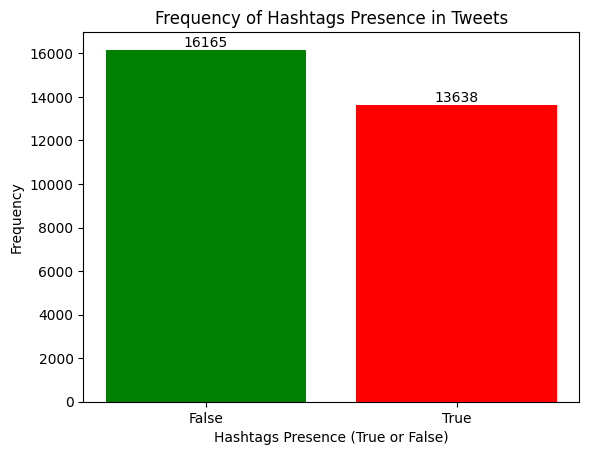

In [ ]:
# Plot the frequency of True and False values with annotations
fig, ax = plt.subplots()
bars = plt.bar(hashtag_counts.index.astype(str), hashtag_counts, color=['green', 'red'])

# Add annotations with value counts within the bars
for bar in bars:
  yval = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


plt.xlabel('Hashtags Presence (True or False)')
plt.ylabel('Frequency')
plt.title('Frequency of Hashtags Presence in Tweets')
plt.show()

In [ ]:
emoji_counts = new_df['has_emojis'].value_counts()
emoji_counts

False    26122
True      3681
Name: has_emojis, dtype: int64

**Bar Plot for Emojis Count**

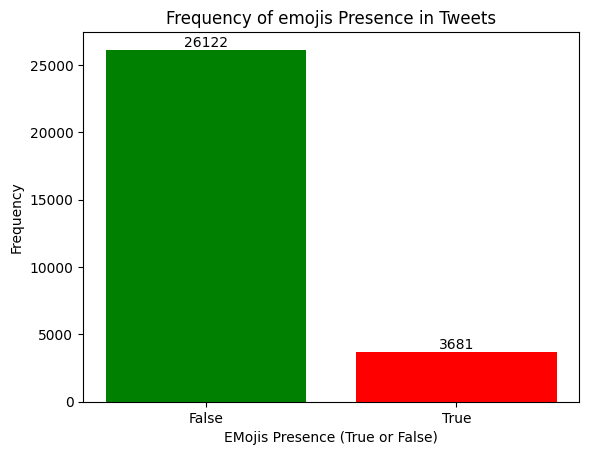

In [ ]:
# Plot the frequency of True and False values with annotations
fig, ax = plt.subplots()
bars = plt.bar(emoji_counts.index.astype(str), emoji_counts, color=['green', 'red'])

# Add annotations with value counts within the bars
for bar in bars:
  yval = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


plt.xlabel('EMojis Presence (True or False)')
plt.ylabel('Frequency')
plt.title('Frequency of emojis Presence in Tweets')
plt.show()

**Frequency of Tweets on Each Day of the Week**

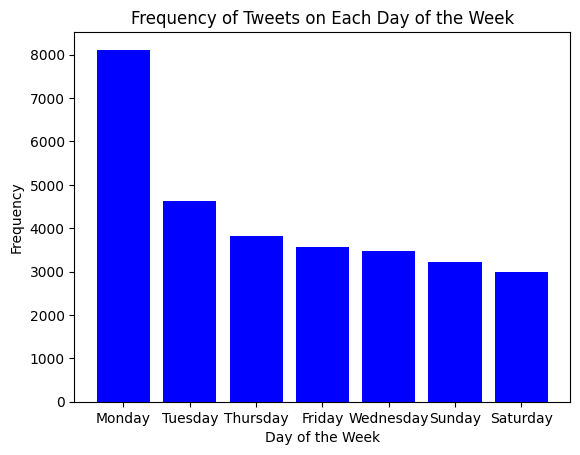

In [ ]:
day_of_week_counts = new_df['day_of_week'].value_counts()

plt.bar(day_of_week_counts.index, day_of_week_counts, color = 'blue')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Tweets on Each Day of the Week')
plt.show()

In [ ]:
day_of_week_counts

Monday       8115
Tuesday      4623
Thursday     3817
Friday       3567
Wednesday    3464
Sunday       3224
Saturday     2993
Name: day_of_week, dtype: int64

In [ ]:
# Find the highest number of hashtags and emojis
max_hashtags_author = new_df.loc[new_df['num_hashtags'].idxmax(), 'author_id']
max_hashtags_tweet = new_df.loc[new_df['num_hashtags'].idxmax(), 'tweet_id']
max_emojis_author = new_df.loc[new_df['emojis_list'].apply(len).idxmax(), 'author_id']
max_emojis_tweet = new_df.loc[new_df['emojis_list'].apply(len).idxmax(), 'tweet_id']

print(f"Highest number of hashtags by Author {max_hashtags_author} in Tweet {max_hashtags_tweet}")
print(f"Highest number of emojis by Author {max_emojis_author} in Tweet {max_emojis_tweet}")

Highest number of hashtags by Author 1.55e+18 in Tweet 168795.0
Highest number of emojis by Author 1.4e+18 in Tweet 172011.0


## Data Preprocessing:

In [ ]:
my_frame = new_df.loc[:, ['author_id', 'tweet_id','text', 'created_at']]
my_frame

,author_id,tweet_id,text,created_at
0,9.050000e+17,1.030258e+06,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00
1,7.638583e+07,1.030186e+06,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00
2,1.480000e+18,1.030263e+06,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00
3,1.150000e+18,1.030274e+06,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00
4,2.112887e+08,1.030288e+06,"One of our newest internship programs, launche...",2023-07-27 20:13:00
...,...,...,...,...
29798,1.480000e+18,1.683840e+18,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:00
29799,2.760856e+08,1.683940e+18,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:00
29800,1.104181e+08,1.683860e+18,The affected &amp; infected have waited decade...,2023-07-25 15:25:00
29801,1.180000e+18,1.683920e+18,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:00


In [ ]:
my_frame.isnull().sum()

author_id     0
tweet_id      0
text          0
created_at    0
dtype: int64

In [ ]:
my_frame.shape

(29803, 4)

In [ ]:
# Filter rows where the 'text' column does not contain both 'Hemophilia' and 'Haemophilia'
filtered_df = my_frame[(my_frame['text'].str.contains('Hemophilia', case=False) | my_frame['text'].str.contains('Haemophilia', case=False))]

# Select the specified columns
data_tweet = filtered_df[['author_id', 'tweet_id', 'text', 'created_at']]
data_tweet

,author_id,tweet_id,text,created_at
0,9.050000e+17,1.030258e+06,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00
1,7.638583e+07,1.030186e+06,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00
2,1.480000e+18,1.030263e+06,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00
3,1.150000e+18,1.030274e+06,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00
4,2.112887e+08,1.030288e+06,"One of our newest internship programs, launche...",2023-07-27 20:13:00
...,...,...,...,...
29798,1.480000e+18,1.683840e+18,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:00
29799,2.760856e+08,1.683940e+18,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:00
29800,1.104181e+08,1.683860e+18,The affected &amp; infected have waited decade...,2023-07-25 15:25:00
29801,1.180000e+18,1.683920e+18,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:00


In [ ]:
data_tweet.isnull().sum()

author_id     0
tweet_id      0
text          0
created_at    0
dtype: int64

In [ ]:
data_tweet.dtypes

author_id            float64
tweet_id             float64
text                  object
created_at    datetime64[ns]
dtype: object

In [ ]:
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

data_tweet['new_text']  = data_tweet['text'].apply(lambda x: p.clean(str(x)) if pd.notna(x) else '')

In [ ]:
data_tweet

,author_id,tweet_id,text,created_at,new_text
0,9.050000e+17,1.030258e+06,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,peaks Challenge #AxioActive On the th of Augus...
1,7.638583e+07,1.030186e+06,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,"Roche Drops Hemophilia A Candidate, Prepares f..."
2,1.480000e+18,1.030263e+06,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,Roche moves one Spark hemophilia gene therapy ...
3,1.150000e+18,1.030274e+06,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,On #WorldHepatitisDay we put middle finger up ...
4,2.112887e+08,1.030288e+06,"One of our newest internship programs, launche...",2023-07-27 20:13:00,"One of our newest internship programs, launche..."
...,...,...,...,...,...
29798,1.480000e+18,1.683840e+18,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:00,"Hear more from Mosi Williams, Pys.D, on the la..."
29799,2.760856e+08,1.683940e+18,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:00,"Was discussing hemophilia with an intelligent,..."
29800,1.104181e+08,1.683860e+18,The affected &amp; infected have waited decade...,2023-07-25 15:25:00,The affected &amp; infected have waited decade...
29801,1.180000e+18,1.683920e+18,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:00,"Sickle cell anemia, Thalassemia, Hemophilia"


In [ ]:
data_tweet.isnull().sum()

author_id     0
tweet_id      0
text          0
created_at    0
new_text      0
dtype: int64

In [ ]:
#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', text)
    return text

data_tweet['new_text'] = data_tweet['new_text'].apply(lambda x:remove_hashtag_sign(x))

In [ ]:
#Remove extra white spaces, punctuation and apply lower casing
data_tweet['new_text'] = data_tweet['new_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_tweet.head()

,author_id,tweet_id,text,created_at,new_text
0,9.050000e+17,1030258.0,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,peaks challenge axioactive on the th of august...
1,7.638583e+07,1030186.0,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,roche drops hemophilia a candidate prepares fo...
2,1.480000e+18,1030263.0,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,roche moves one spark hemophilia gene therapy ...
3,1.150000e+18,1030274.0,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,on worldhepatitisday we put middle finger up t...
4,2.112887e+08,1030288.0,"One of our newest internship programs, launche...",2023-07-27 20:13:00,one of our newest internship programs launched...


In [ ]:
data_tweet.shape

(27396, 5)

In [ ]:
#Lemmatize the text
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data_tweet['new_lemma_text'] = data_tweet["new_text"].apply(lemmatize_text)

In [ ]:
data_tweet

,author_id,tweet_id,text,created_at,new_text,new_lemma_text
0,9.050000e+17,1.030258e+06,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,2023-07-28 08:18:00,peaks challenge axioactive on the th of august...,peak challenge axioactive on the th of august ...
1,7.638583e+07,1.030186e+06,"Roche Drops Hemophilia A Candidate, Prepares f...",2023-07-27 15:51:00,roche drops hemophilia a candidate prepares fo...,roche drop hemophilia a candidate prepares for...
2,1.480000e+18,1.030263e+06,Roche moves one Spark hemophilia gene therapy ...,2023-07-28 06:34:00,roche moves one spark hemophilia gene therapy ...,roche move one spark hemophilia gene therapy i...
3,1.150000e+18,1.030274e+06,On #WorldHepatitisDay we put middle finger up ...,2023-07-28 00:27:00,on worldhepatitisday we put middle finger up t...,on worldhepatitisday we put middle finger up t...
4,2.112887e+08,1.030288e+06,"One of our newest internship programs, launche...",2023-07-27 20:13:00,one of our newest internship programs launched...,one of our newest internship program launched ...
...,...,...,...,...,...,...
29798,1.480000e+18,1.683840e+18,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:00,hear more from mosi williams pys d on the late...,hear more from mosi williams pys d on the late...
29799,2.760856e+08,1.683940e+18,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:00,was discussing hemophilia with an intelligent ...,wa discussing hemophilia with an intelligent e...
29800,1.104181e+08,1.683860e+18,The affected &amp; infected have waited decade...,2023-07-25 15:25:00,the affected amp infected have waited decades ...,the affected amp infected have waited decade f...
29801,1.180000e+18,1.683920e+18,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:00,sickle cell anemia thalassemia hemophilia,sickle cell anemia thalassemia hemophilia


# Topic Modelling:

In [ ]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [ ]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
# #Tokenize topics
# nltk.download('stopwords')
# stopwords = stopwords.words('english')
# vectorizer_model = CountVectorizer(stop_words= stopwords)

vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
#Create topic representation
ctfidf_model = ClassTfidfTransformer()

In [ ]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics='auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [ ]:
tweet_list = data_tweet.new_lemma_text.tolist()
timestamp=data_tweet.created_at.tolist()

In [ ]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-01-31 07:35:51,634 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/857 [00:00<?, ?it/s]

2024-01-31 07:45:54,720 - BERTopic - Embedding - Completed ✓
2024-01-31 07:45:54,722 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-31 07:47:12,935 - BERTopic - Dimensionality - Completed ✓
2024-01-31 07:47:12,938 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-31 08:02:10,085 - BERTopic - Cluster - Completed ✓
2024-01-31 08:02:10,089 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-31 08:04:24,836 - BERTopic - Representation - Completed ✓
2024-01-31 08:04:24,841 - BERTopic - Topic reduction - Reducing number of topics
2024-01-31 08:04:30,505 - BERTopic - Topic reduction - Reduced number of topics from 657 to 20


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3938,-1_hemophilia_haemophilia_bleeding_blood,"[hemophilia, haemophilia, bleeding, blood, tre...",[today is world hemophilia day and this year t...
1,0,22839,0_hemophilia_haemophilia_day_blood,"[hemophilia, haemophilia, day, blood, treatmen...","[hemophilia a, hemophilia, world hemophilia da..."
2,1,100,1_thanks_project_congratulation_lusher,"[thanks, project, congratulation, lusher, staf...","[thank you for your support, thank you, thank ..."
3,2,76,2_int_justin_yds_claypool,"[int, justin, yds, claypool, clutch, nfl, stol...",[justin field sophomore season is over let rev...
4,3,54,3_gadfly_bolt_jackboot_jab,"[gadfly, bolt, jackboot, jab, idealise, icepac...",[kettle icecap jackboot gala haemorrhoid haemo...
5,4,50,4_gunshot_bleeding_disorder_bullet,"[gunshot, bleeding, disorder, bullet, child, n...",[do those bleeding disorder include gunshot wo...
6,5,42,5_havana_conduction_oxidative_microwave,"[havana, conduction, oxidative, microwave, mel...",[dr beatrice golomb uc san diego medical cente...
7,6,41,6_heart_migraine_polyneuropathy_thrombocytopenia,"[heart, migraine, polyneuropathy, thrombocytop...",[more than brand new pfizer pipeline will hit ...
8,7,34,7_tl_retweeted_bot_ethereum,"[tl, retweeted, bot, ethereum, uniswap, fortun...",[i can t believe no one is discussing this iss...
9,8,26,8_scheme_maharashtra_transport_dailysis,"[scheme, maharashtra, transport, dailysis, pos...",[shinde sarkar working for welfare of the peop...


# Let's check what are the words the first topic contains:

In [ ]:
topic_model.get_topic(0)

[('hemophilia', 0.03637380276453562),
 ('haemophilia', 0.02499117243543675),
 ('day', 0.018956222516969327),
 ('blood', 0.016527308823969515),
 ('treatment', 0.01490818345231945),
 ('disease', 0.011864343019727726),
 ('worldhemophiliaday', 0.009836769858943273),
 ('support', 0.009354638813969097),
 ('health', 0.009041281326136774),
 ('bleed', 0.008504089185093084)]

# Create a list of words under every topic

In [ ]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12,Topic # 13,Topic # 14,Topic # 15,Topic # 16,Topic # 17,Topic # 18,Topic # 19
0,hemophilia,thanks,int,gadfly,gunshot,havana,heart,tl,scheme,join,tattoo,tampon,syndrome,pray,congratulation,gssy,epf20,forward,nebraska
1,haemophilia,project,justin,bolt,bleeding,conduction,migraine,retweeted,maharashtra,nhf,weekend,unsanitary,genetic,prayer,heartiest,spiritualsciencelab,nmo,phew,madison
2,day,congratulation,yds,jackboot,disorder,oxidative,polyneuropathy,bot,transport,research,secondlife,sanitary,heart,lupus,thosemostwriter,heals,meeting,pace,foundation
3,blood,lusher,claypool,jab,bullet,microwave,thrombocytopenia,ethereum,dailysis,journal,ear,diaper,fibrosis,cancer,fem,arthritis,assessment,hell,lake
4,treatment,staffer,clutch,idealise,child,melatonin,immune,uniswap,positive,heavymenstrualbleeding,item,kotex,vaccination,hurricaneian,tribute,asthma,summit,presenting,mix
5,disease,zro,nfl,icepack,nra,ultrasound,scamcovid19,fortune,sarkar,scholarlyresearch,sale,poverty,cystic,lymphoma,lovely,diabetes,healthliteracy,eating,contest
6,worldhemophiliaday,polyhedron,stole,icecream,provoked,aging,sickle,airdrop,hiv,mba,nexus,hygiene,toxin,pandemic,michael,benefit,futurehealth,ll,maryed
7,support,intern,montgomery,whenthroughstrong,wounded,cancer,pfizer,exploit,welfare,brussels,fav,disposable,mrna,broken,wow,cure,patientengagement,journey,showcasing
8,health,cara,field,ibis,firearm,medical,demyelinating,claim,dialysis,mentor,piercings,fecephilia,symptom,house,highlighted,aid,dominican,miss,judge
9,bleed,stimulating,hemophilia,servicehimselfreach,gunreformnow,hemophilia,topline,oppofindn2flip,initiative,robert,grunge,vagina,hematuria,shelter,paper,disease,care,look,celebrity


# Model Visualization:

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=10, n_words = 10)

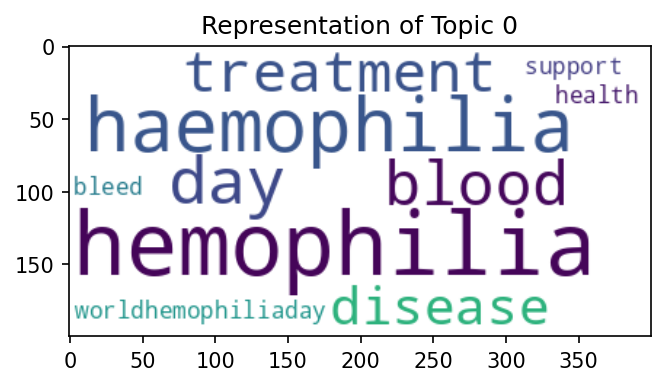

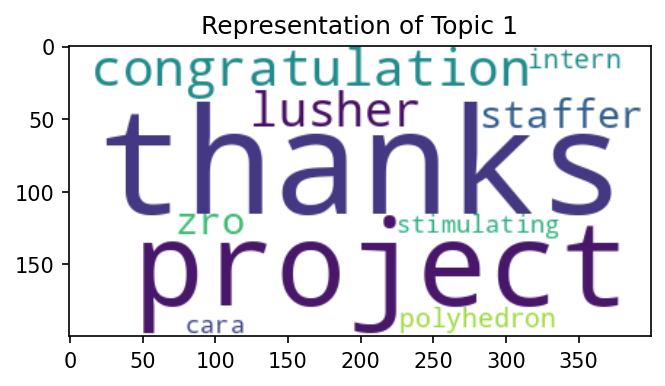

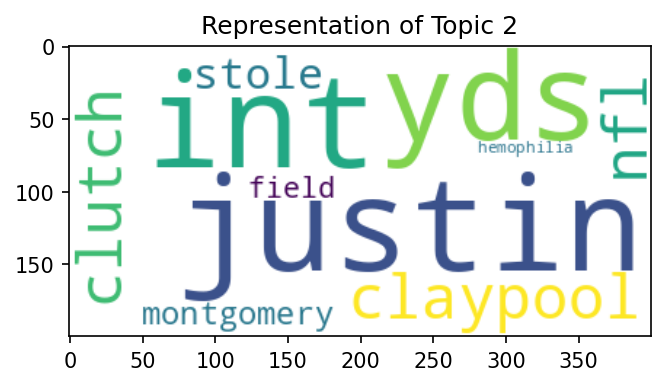

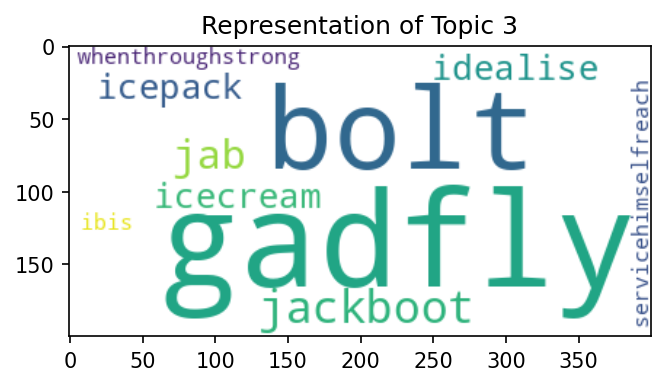

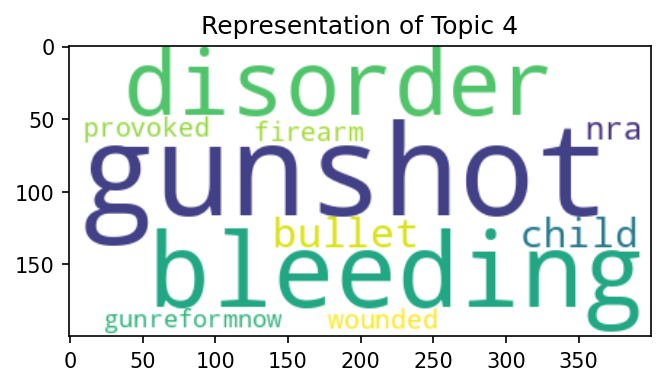

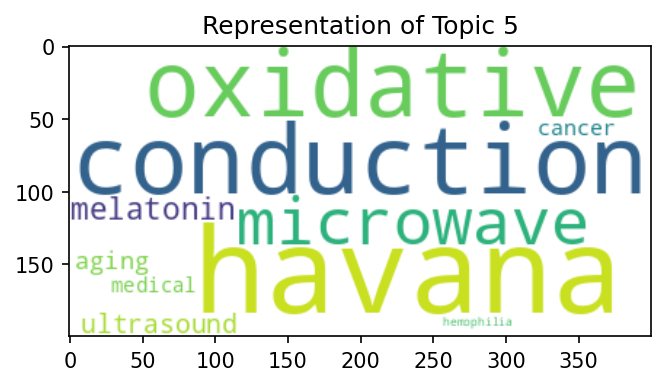

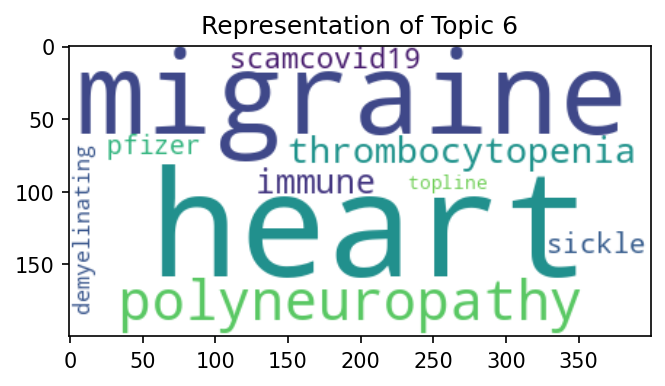

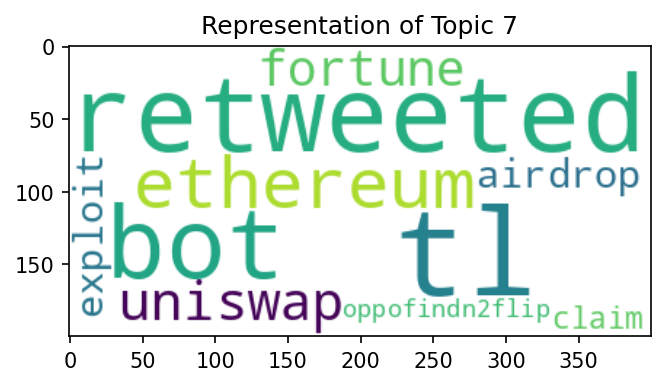

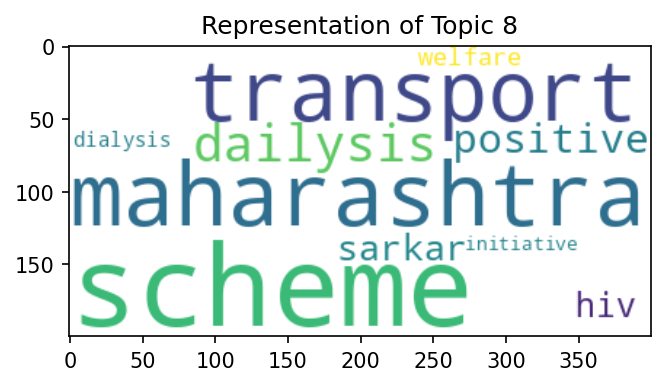

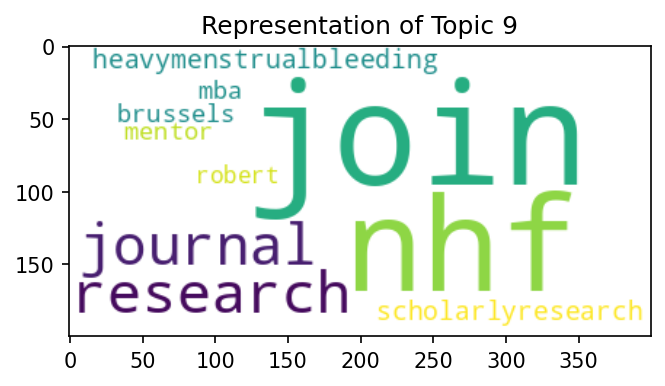

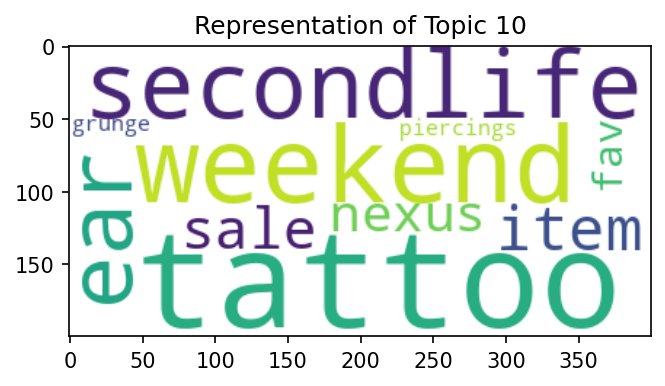

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

#visualize the top 10 topics
for i in range(0,11):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_heatmap(n_clusters = 10)

## let's do the similarity matrix for the top 10 topics

In [ ]:
topic_model.visualize_heatmap(top_n_topics=10, n_clusters = 5)

## Topics over time calculation:

In [ ]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

19it [00:35,  1.85s/it]


,Topic,Words,Frequency,Timestamp
0,-1,"hemophilia, pwd, haemophilia, gene, disease",177,2023-01-01 15:54:58.860
1,0,"hemophilia, haemophilia, blood, bleeding, diso...",916,2023-01-01 15:54:58.860
2,1,"thanks, project, glad, congratulation, polyhedron",2,2023-01-01 15:54:58.860
3,3,"jab, jackboot, gait, gadget, jabbered",2,2023-01-01 15:54:58.860
4,7,"weekend, news, retweeted, bot, ethereum",2,2023-01-01 15:54:58.860
...,...,...,...,...
151,-1,"bos, ukraine, hemophilia, haemophilia, gibson",64,2023-11-21 22:34:03.000
152,0,"hemophilia, haemophilia, blood, plz, treatment",426,2023-11-21 22:34:03.000
153,7,"tl, retweeted, bot, ethereum, devs",2,2023-11-21 22:34:03.000
154,10,"tattoo, weekend, secondlife, ear, item",8,2023-11-21 22:34:03.000


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', top_n_topics=10,height = 450, width = 850)

## Here as we can see topic 0 has the peak for always compared to other topics. So that those topics over time graph is not that visible rather being congested with each other. Hence normalizing the frequency of the topics over time, so that all the frequency comes in between 0 to 1 and we get a better idea of the topics being discussed. The below diagram is showing normaized frequency.

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True, top_n_topics=10,height = 450, width = 850)

In [ ]:
docs = tweet_list

## Visualize a hierarchical structure of the topics:


In [ ]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


100%|██████████| 18/18 [00:04<00:00,  3.72it/s]


# **MODEL VALIDATION**

In [ ]:
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.7624180127089597
